In [1]:
# 1) import the necessary analysis and visualization libraries, then import your most up-to-date project data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path= r"C:\Users\Holly\OneDrive\David's work\Instacart Basket Analysis"

In [5]:
final_df= pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','full_merged_cleaned.pkl'))

In [9]:
#2 )  follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

<Axes: xlabel='orders_day_of_week'>

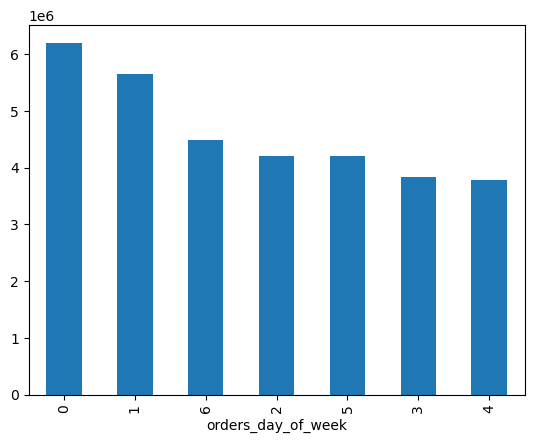

In [7]:
# Bar charts 
final_df['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

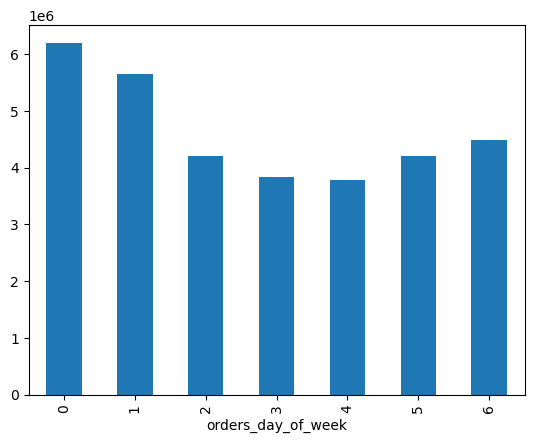

In [15]:
# Bar chart in index order 
final_df['orders_day_of_week'].value_counts().sort_index().plot.bar()

<Axes: xlabel='orders_day_of_week'>

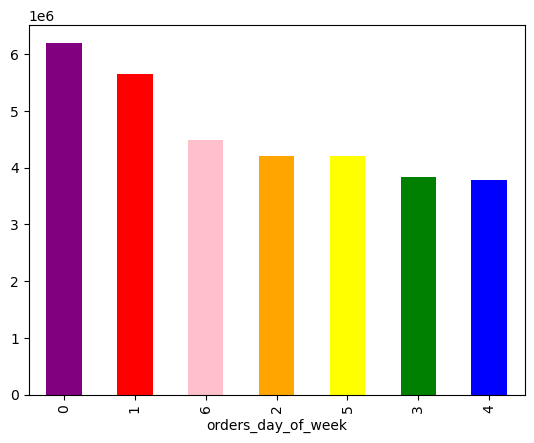

In [19]:
# Changing the color of the bars 
final_df['orders_day_of_week'].value_counts().plot.bar(color=['purple','red','pink','orange','yellow','green','blue'])

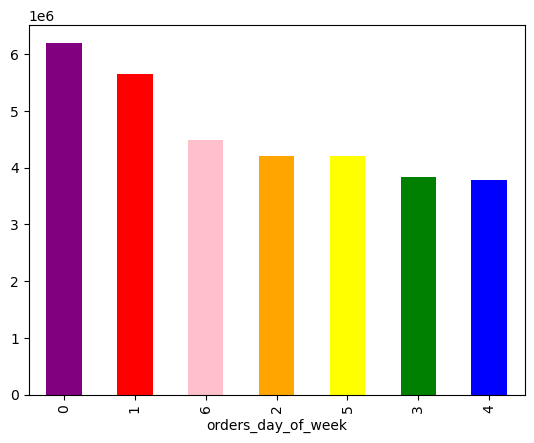

In [9]:
# Exporting charts
bar = final_df['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [11]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

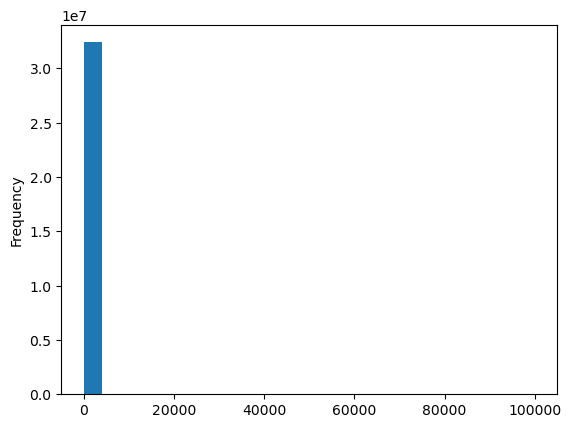

In [29]:
# Creating histograms and scatterplots 
final_df['prices'].plot.hist(bins = 25)

In [72]:
final_df.loc[final_df['prices'] >100, 'prices'] = np.nan

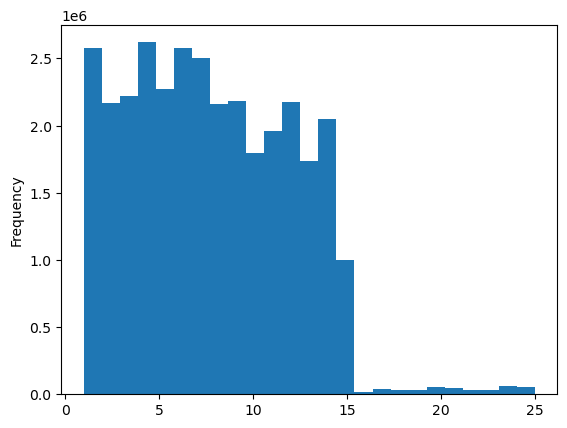

In [42]:
hist= final_df['prices'].plot.hist(bins=25)

In [44]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_dow.png'))

In [7]:
# Creating line charts and sampling data
np.random.seed(4)
dev = np.random.rand(len(final_df)) <= 0.7

In [9]:
big = final_df[dev]
small = final_df [~dev]

In [52]:
len(final_df)

32404859

In [54]:
len(big)+len(small)

32404859

In [11]:
df_2 = small[['orders_day_of_week','prices']]

In [17]:
# Counting how many prices are greater than 18 as they will be counted as outliers
outlier_count = df_2[df_2['prices'] > 20].shape[0]

In [19]:
outlier_count

69542

In [29]:
# Remove rows where prices are greater than 20
df_2 = df_2[df_2['prices'] <= 15]

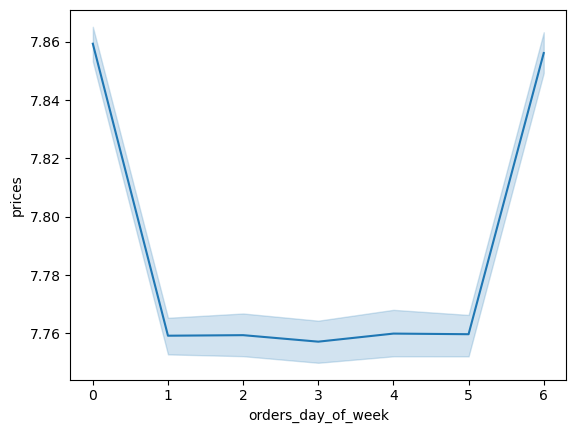

In [58]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [60]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders_dow.png'))

In [74]:
final_df['prices'].max()

25.0

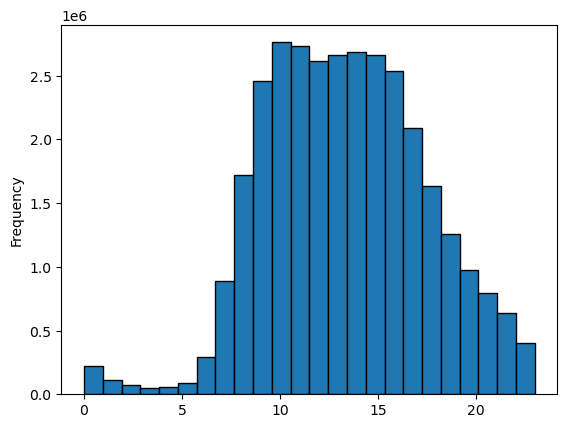

In [13]:
# 3) Create a histogram of the “order_hour_of_day” column.
# In a markdown cell beneath your histogram, describe what the histogram demonstrates.
hist_hod= final_df['order_hour_of_day'].plot.hist(bins=24, edgecolor='black')

In [15]:
# Export your visualizations as “.png” files in your relevant project folder
hist_hod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_hod.png'))

### The histogram shows that most orders are placed between 9 AM and 4 PM, with a peak around late morning to early afternoon. There are very few orders during the early morning hours (before 6 AM) and fewer again in the late evening, suggesting users are most active during typical daytime hours

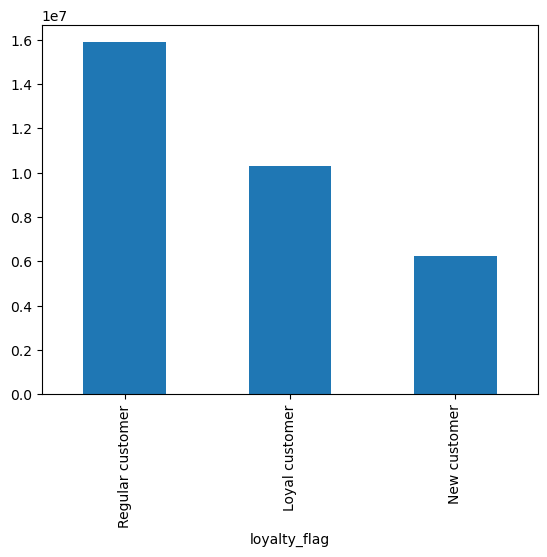

In [115]:
# 4) Create a bar chart from the “loyalty_flag” column.
bar= final_df['loyalty_flag'].value_counts().plot.bar()

In [117]:
# Export your visualizations as “.png” files in your relevant project folder
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [81]:
# 5) Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day

In [25]:
df_2 = small[['order_hour_of_day', 'prices']]

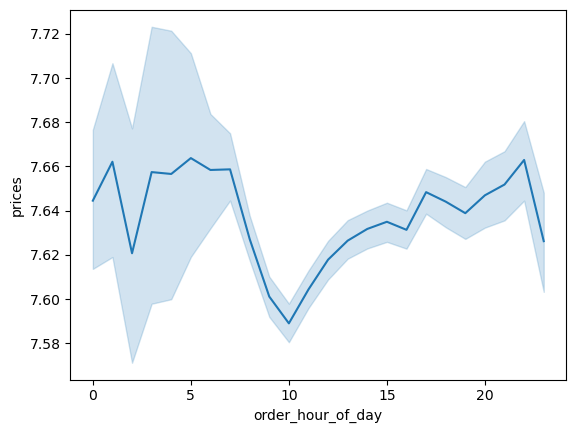

In [31]:
line = sns.lineplot(data = df_2, x = 'order_hour_of_day', y = 'prices')

In [27]:
# Export your visualizations as “.png” files in your relevant project folder
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hod_price.png'))

In [111]:
# 6) determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents
# In a markdown cell beneath your line chart, describe what the line chart shows.

In [93]:
df_age_dep = small[['Age', 'n_dependants']]

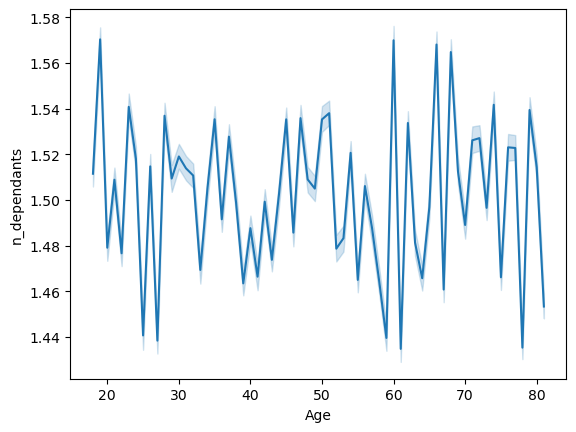

In [123]:
line_2 = sns.lineplot(data=df_age_dep, x='Age', y='n_dependants')

### While the pattern fluctuates slightly, the average number of dependents remains relatively stable across age groups, typically around 1.5. This suggests there is no strong or consistent trend in the number of dependents based on age alone

In [126]:
# Export your visualizations as “.png” files in your relevant project folder
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants'))

In [100]:
# 7) You’ll also need to explore whether there’s a connection between age and spending power (income).
# To visualize this relationship, create a scatterplot using the sns.scatterplot() function

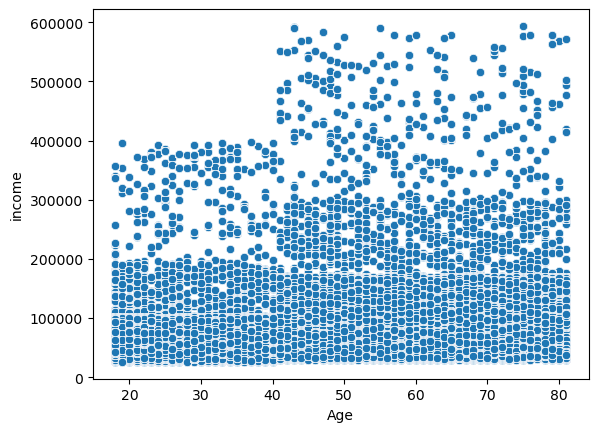

In [128]:
plot= sns.scatterplot(data=small, x='Age', y='income')

### we can observe that income tends to increase slightly with age, especially between the ages of 20 and 50. After that, income levels appear to stabilize. However, the variation is high across all ages, suggesting that age alone is not a strong predictor of income in this dataset

In [130]:
# Export your visualizations as “.png” files in your relevant project folder

In [133]:
plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'plot_age_income'))